**Online news article data- III- Four classes**

In [1]:
import pandas as pd

Dataset3 = pd.read_csv('Dataset3.csv')
Dataset3

,Class Index,Description
0,3,reuter short seller wall street dwindl band ul...
1,3,reuter privat invest firm carlyl group reput m...
2,3,reuter soar crude price plu worri economi outl...
3,3,reuter author halt oil export flow main pipeli...
4,3,afp tearaway world oil price toppl record stra...
...,...,...
126286,1,ukrainian presidenti candid viktor yushchenko ...
126287,2,suppli attract pitch option dwindl daili lost ...
126288,2,like roger clemen almost exactli eight year ea...
126289,3,singapor doctor unit state warn painkil bextra...


## Four classes in output category

### 1-World, 2-Sports, 3-Business, 4-Sci/Tech

In [2]:
import warnings as DDD
DDD.filterwarnings("ignore")

In [3]:
Dataset3['Class Index'].value_counts()

Class Index
2    31717
1    31647
3    31507
4    31420
Name: count, dtype: int64

In [4]:
o_Data= Dataset3['Class Index']

In [5]:
import gensim

In [6]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import numpy as np

text_data = Dataset3['Description'].values.astype('U')

tokenized_data = [word_tokenize(text.lower()) for text in text_data]

model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=1, workers=4)

word_vectors = []
for sentence in tokenized_data:
    vec = np.zeros(model.vector_size)  
    num_words = 0
    for word in sentence:
        if word in model.wv:
            vec += model.wv[word]
            num_words += 1
    if num_words > 0:
        vec /= num_words  # Average the vectors
    word_vectors.append(vec)

# Convert word_vectors to array
i_Data = np.array(word_vectors)

print("Shape of word vectors array:", i_Data.shape)


Shape of word vectors array: (126291, 100)


In [7]:
from sklearn.model_selection import train_test_split as TTS

ir_Data3, is_Data3, or_Data3, os_Data3 = TTS(i_Data, o_Data, test_size= 0.4, random_state= 223)
iv_Data3, is_Data3, ov_Data3, os_Data3 = TTS(is_Data3, os_Data3, test_size= 0.5, random_state= 223)

In [8]:
ir_Data3.shape #      train

(75774, 100)

In [9]:
iv_Data3.shape #          Validation

(25258, 100)

In [10]:
is_Data3.shape #      test

(25259, 100)

## **Machine Learning Algorithms**

In [11]:
from sklearn.metrics import classification_report as CR
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import ConfusionMatrixDisplay as CMD
from sklearn.metrics import accuracy_score
import time as T
from sklearn.model_selection import GridSearchCV as GGR

**Logistic Regression**


In [12]:
#Hyperperameter Tuning
from sklearn.linear_model import LogisticRegression as LR

ONA_K = {'penalty': ['l1', 'l2', 'elasticnet', None],
            'multi_class': ['auto', 'ovr', 'multinomial']}

ONA_KM = LR(random_state= 223)
ONA_KM = GGR(ONA_KM, ONA_K, cv=2 )
ONA_KM.fit(ir_Data3[:5000],or_Data3[:5000])

print(ONA_KM.best_params_)
print(ONA_KM.best_score_)

{'multi_class': 'ovr', 'penalty': 'l2'}
0.8584


In [13]:
Mteric_s = T.time()

Mo_News = LR(**ONA_KM.best_params_)
Mo_News.fit(ir_Data3, or_Data3)

Mteric_d = T.time()
print("time-dur-training =", Mteric_d- Mteric_s)
Mo_News

time-dur-training = 5.687660217285156


LogisticRegression(multi_class='ovr')

              precision    recall  f1-score   support

           1       0.88      0.87      0.88      6241
           2       0.93      0.96      0.94      6352
           3       0.84      0.82      0.83      6296
           4       0.84      0.84      0.84      6369

    accuracy                           0.87     25258
   macro avg       0.87      0.87      0.87     25258
weighted avg       0.87      0.87      0.87     25258

time-dur-validating = 1.075422763824463


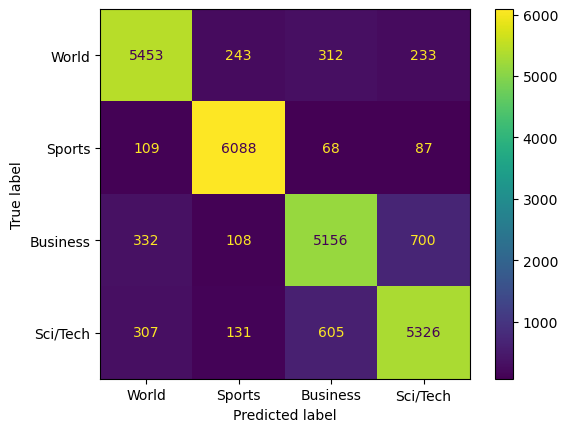

In [14]:
#Validation Set

Mteric_s = T.time()

pe_Data3 = Mo_News.predict(iv_Data3)
print(CR(ov_Data3,pe_Data3))
L = CM(ov_Data3,pe_Data3)
D = CMD(confusion_matrix = L, display_labels = ['World', 'Sports', 'Business', 'Sci/Tech'])
D.plot()

Mteric_d = T.time()
print("time-dur-validating =", Mteric_d- Mteric_s)

              precision    recall  f1-score   support

           1       0.89      0.87      0.88      6371
           2       0.93      0.96      0.94      6274
           3       0.83      0.83      0.83      6310
           4       0.84      0.82      0.83      6304

    accuracy                           0.87     25259
   macro avg       0.87      0.87      0.87     25259
weighted avg       0.87      0.87      0.87     25259

time-dur-testing = 0.15793657302856445


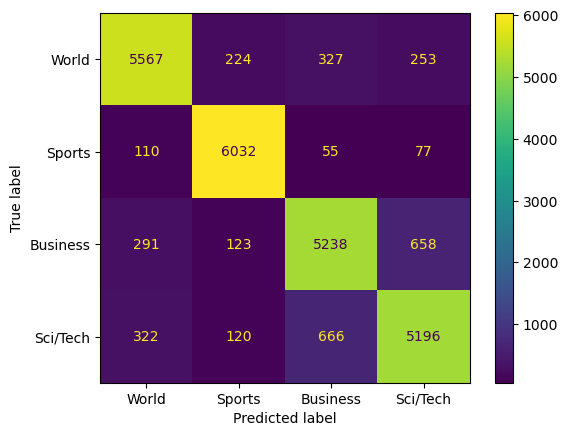

In [15]:
Mteric_s = T.time()

pe_Data3 = Mo_News.predict(is_Data3)
print(CR(os_Data3,pe_Data3))
L = CM(os_Data3,pe_Data3)
D = CMD(confusion_matrix = L, display_labels = ['World', 'Sports', 'Business', 'Sci/Tech'])
D.plot()

Mteric_d = T.time()
print("time-dur-testing =", Mteric_d- Mteric_s)

In [16]:
accuracy_LR = round(accuracy_score(os_Data3,pe_Data3),2)
accuracy_LR

0.87

**SVM**


In [17]:
from sklearn.svm import SVC as svm

ONA_K = {'max_iter': [1, -1, 2, 3],
            'decision_function_shape': ['ovo', 'ovr'],
         'kernel': ['sigmpid', 'poly', 'rbf']}

ONA_KM = svm(random_state= 223)
ONA_KM = GGR(ONA_KM, ONA_K, cv=2 )
ONA_KM.fit(ir_Data3[:5000],or_Data3[:5000])

print(ONA_KM.best_params_)
print(ONA_KM.best_score_)

{'decision_function_shape': 'ovo', 'kernel': 'rbf', 'max_iter': -1}
0.8655999999999999


In [18]:
Mteric_s = T.time()

Mo_News = svm(**ONA_KM.best_params_)
Mo_News.fit(ir_Data3[:10000], or_Data3[:10000])

Mteric_d = T.time()
print("time-dur-training =", Mteric_d- Mteric_s)
Mo_News

time-dur-training = 4.507160902023315


SVC(decision_function_shape='ovo')

              precision    recall  f1-score   support

           1       0.89      0.87      0.88      6241
           2       0.94      0.96      0.95      6352
           3       0.84      0.83      0.84      6296
           4       0.84      0.85      0.85      6369

    accuracy                           0.88     25258
   macro avg       0.88      0.88      0.88     25258
weighted avg       0.88      0.88      0.88     25258

time-dur-validating = 14.288217782974243


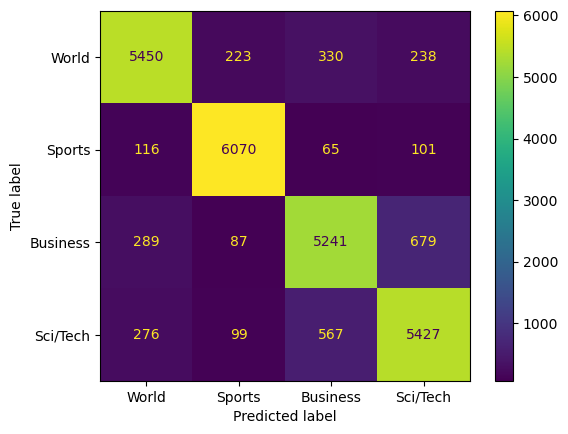

In [19]:
Mteric_s = T.time()

pe_Data3 = Mo_News.predict(iv_Data3)
print(CR(ov_Data3,pe_Data3))
L = CM(ov_Data3,pe_Data3)
D = CMD(confusion_matrix = L, display_labels = ['World', 'Sports', 'Business', 'Sci/Tech'])
D.plot()

Mteric_d = T.time()
print("time-dur-validating =", Mteric_d- Mteric_s)

              precision    recall  f1-score   support

           1       0.89      0.87      0.88      6371
           2       0.94      0.96      0.95      6274
           3       0.83      0.83      0.83      6310
           4       0.83      0.84      0.83      6304

    accuracy                           0.87     25259
   macro avg       0.87      0.87      0.87     25259
weighted avg       0.87      0.87      0.87     25259

time-dur-testing = 14.758230209350586


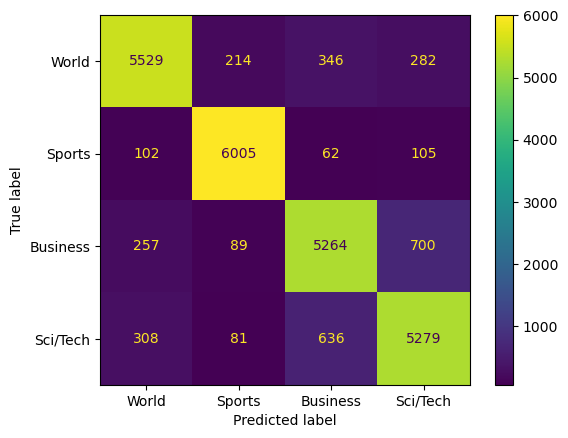

In [20]:
Mteric_s = T.time()

pe_Data3 = Mo_News.predict(is_Data3)
print(CR(os_Data3,pe_Data3))
L = CM(os_Data3,pe_Data3)
D = CMD(confusion_matrix = L, display_labels = ['World', 'Sports', 'Business', 'Sci/Tech'])
D.plot()

Mteric_d = T.time()
print("time-dur-testing =", Mteric_d- Mteric_s)

In [21]:
accuracy_SVM = round(accuracy_score(os_Data3,pe_Data3),2)
accuracy_SVM

0.87

**Decision Tree**


In [22]:
from sklearn.tree import DecisionTreeClassifier as DT

ONA_K = {'criterion': ['gini', 'entropy', 'log_loss'],
            'max_features': ['auto', 'sqrt', 'log2']}

ONA_KM = DT(random_state= 223)
ONA_KM = GGR(ONA_KM, ONA_K, cv=2 )
ONA_KM.fit(ir_Data3[:5000],or_Data3[:5000])

print(ONA_KM.best_params_)
print(ONA_KM.best_score_)

{'criterion': 'entropy', 'max_features': 'sqrt'}
0.7182


In [23]:
Mteric_s = T.time()

Mo_News = DT(**ONA_KM.best_params_)
Mo_News.fit(ir_Data3, or_Data3)

Mteric_d = T.time()
print("time-dur-training =", Mteric_d- Mteric_s)
Mo_News

time-dur-training = 4.986721038818359


DecisionTreeClassifier(criterion='entropy', max_features='sqrt')

              precision    recall  f1-score   support

           1       0.77      0.79      0.78      6241
           2       0.87      0.87      0.87      6352
           3       0.71      0.71      0.71      6296
           4       0.73      0.72      0.72      6369

    accuracy                           0.77     25258
   macro avg       0.77      0.77      0.77     25258
weighted avg       0.77      0.77      0.77     25258

time-dur-validating = 0.11812329292297363


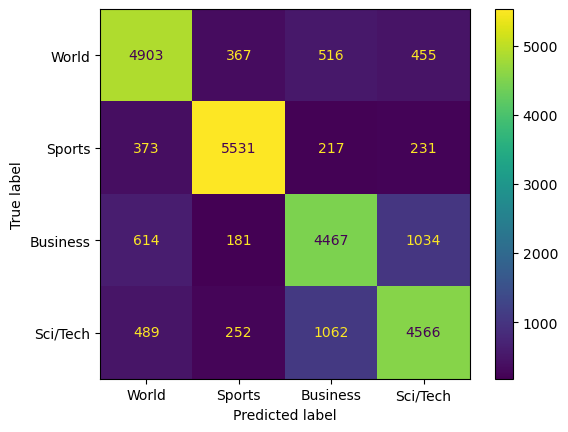

In [24]:
Mteric_s = T.time()

pe_Data3 = Mo_News.predict(iv_Data3)
print(CR(ov_Data3,pe_Data3))
L = CM(ov_Data3,pe_Data3)
D = CMD(confusion_matrix = L, display_labels = ['World', 'Sports', 'Business', 'Sci/Tech'])
D.plot()

Mteric_d = T.time()
print("time-dur-validating =", Mteric_d- Mteric_s)

              precision    recall  f1-score   support

           1       0.78      0.79      0.78      6371
           2       0.87      0.87      0.87      6274
           3       0.72      0.72      0.72      6310
           4       0.73      0.72      0.72      6304

    accuracy                           0.78     25259
   macro avg       0.78      0.78      0.78     25259
weighted avg       0.78      0.78      0.78     25259

time-dur-testing = 0.12993621826171875


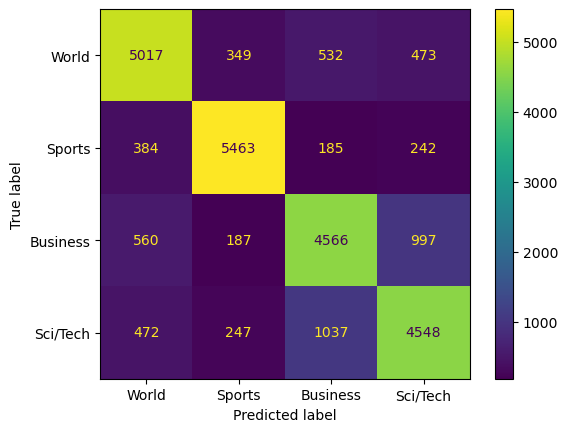

In [25]:
Mteric_s = T.time()

pe_Data3 = Mo_News.predict(is_Data3)
print(CR(os_Data3,pe_Data3))
L = CM(os_Data3,pe_Data3)
D = CMD(confusion_matrix = L, display_labels = ['World', 'Sports', 'Business', 'Sci/Tech'])
D.plot()

Mteric_d = T.time()
print("time-dur-testing =", Mteric_d- Mteric_s)

In [26]:
accuracy_RF = round(accuracy_score(os_Data3,pe_Data3),2)
accuracy_RF

0.78

**Random Forest**


In [27]:
from sklearn.ensemble import RandomForestClassifier as RF

ONA_K = {'criterion': ['gini', 'entropy', 'log_loss'],
            'max_features': ['auto', 'sqrt', 'log2']}

ONA_KM = RF(random_state= 223)
ONA_KM = GGR(ONA_KM, ONA_K, cv=2 )
ONA_KM.fit(ir_Data3[:5000],or_Data3[:5000])

print(ONA_KM.best_params_)
print(ONA_KM.best_score_)

{'criterion': 'gini', 'max_features': 'log2'}
0.8524


In [28]:
Mteric_s = T.time()

Mo_News = RF(**ONA_KM.best_params_)
Mo_News.fit(ir_Data3, or_Data3)

Mteric_d = T.time()
print("time-dur-training =", Mteric_d- Mteric_s)
Mo_News

time-dur-training = 240.1471345424652


RandomForestClassifier(max_features='log2')

              precision    recall  f1-score   support

           1       0.88      0.87      0.88      6241
           2       0.92      0.96      0.94      6352
           3       0.84      0.83      0.83      6296
           4       0.84      0.84      0.84      6369

    accuracy                           0.87     25258
   macro avg       0.87      0.87      0.87     25258
weighted avg       0.87      0.87      0.87     25258

time-dur-validating = 0.8950095176696777


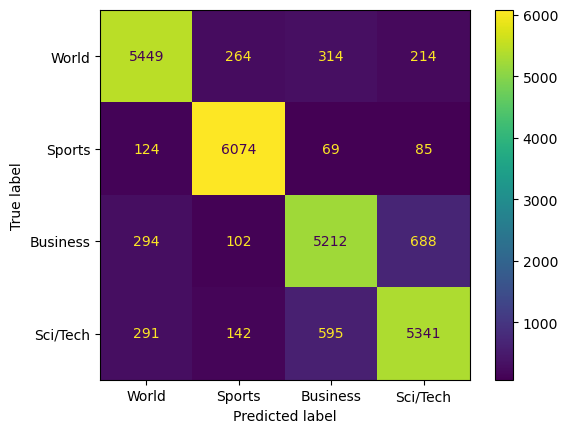

In [29]:
Mteric_s = T.time()

pe_Data3 = Mo_News.predict(iv_Data3)
print(CR(ov_Data3,pe_Data3))
L = CM(ov_Data3,pe_Data3)
D = CMD(confusion_matrix = L, display_labels = ['World', 'Sports', 'Business', 'Sci/Tech'])
D.plot()

Mteric_d = T.time()
print("time-dur-validating =", Mteric_d- Mteric_s)

              precision    recall  f1-score   support

           1       0.89      0.87      0.88      6371
           2       0.92      0.96      0.94      6274
           3       0.83      0.83      0.83      6310
           4       0.84      0.83      0.83      6304

    accuracy                           0.87     25259
   macro avg       0.87      0.87      0.87     25259
weighted avg       0.87      0.87      0.87     25259

time-dur-testing = 0.8872337341308594


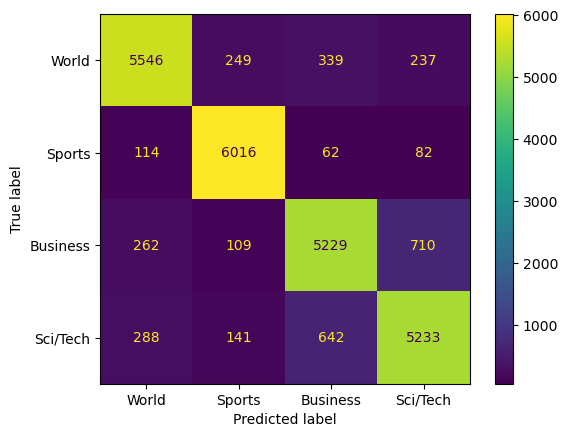

In [30]:
Mteric_s = T.time()

pe_Data3 = Mo_News.predict(is_Data3)
print(CR(os_Data3,pe_Data3))
L = CM(os_Data3,pe_Data3)
D = CMD(confusion_matrix = L, display_labels = ['World', 'Sports', 'Business', 'Sci/Tech'])
D.plot()

Mteric_d = T.time()
print("time-dur-testing =", Mteric_d- Mteric_s)

In [31]:
accuracy_RF = round(accuracy_score(os_Data3,pe_Data3),2)
accuracy_RF

0.87

**Gradient Boosting**

In [32]:
from sklearn.ensemble import GradientBoostingClassifier as GB

ONA_K = {'criterion': ['friedman_mse', 'squared_error'],
            'max_features': ['sqrt', 'log2']}

ONA_KM = GB(random_state= 223)
ONA_KM = GGR(ONA_KM, ONA_K, cv=2 )
ONA_KM.fit(ir_Data3[:5000],or_Data3[:5000])

print(ONA_KM.best_params_)
print(ONA_KM.best_score_)

{'criterion': 'friedman_mse', 'max_features': 'log2'}
0.8566


In [33]:
Mteric_s = T.time()

Mo_News = GB(**ONA_KM.best_params_)
Mo_News.fit(ir_Data3, or_Data3)

Mteric_d = T.time()
print("time-dur-training =", Mteric_d- Mteric_s)
Mo_News

time-dur-training = 253.66807222366333


GradientBoostingClassifier(max_features='log2')

              precision    recall  f1-score   support

           1       0.88      0.87      0.87      6241
           2       0.92      0.95      0.94      6352
           3       0.83      0.82      0.83      6296
           4       0.83      0.83      0.83      6369

    accuracy                           0.87     25258
   macro avg       0.87      0.87      0.87     25258
weighted avg       0.87      0.87      0.87     25258

time-dur-validating = 0.45781922340393066


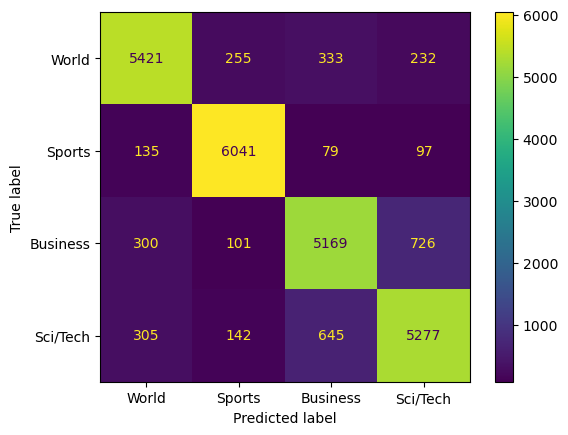

In [34]:
Mteric_s = T.time()

pe_Data3 = Mo_News.predict(iv_Data3)
print(CR(ov_Data3,pe_Data3))
L = CM(ov_Data3,pe_Data3)
D = CMD(confusion_matrix = L, display_labels = ['World', 'Sports', 'Business', 'Sci/Tech'])
D.plot()

Mteric_d = T.time()
print("time-dur-validating =", Mteric_d- Mteric_s)

              precision    recall  f1-score   support

           1       0.88      0.87      0.88      6371
           2       0.93      0.95      0.94      6274
           3       0.82      0.82      0.82      6310
           4       0.82      0.82      0.82      6304

    accuracy                           0.87     25259
   macro avg       0.86      0.87      0.86     25259
weighted avg       0.86      0.87      0.86     25259

time-dur-testing = 0.4592440128326416


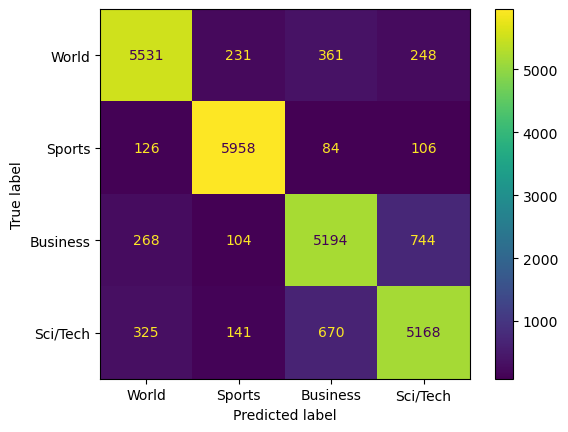

In [35]:
Mteric_s = T.time()

pe_Data3 = Mo_News.predict(is_Data3)
print(CR(os_Data3,pe_Data3))
L = CM(os_Data3,pe_Data3)
D = CMD(confusion_matrix = L, display_labels = ['World', 'Sports', 'Business', 'Sci/Tech'])
D.plot()

Mteric_d = T.time()
print("time-dur-testing =", Mteric_d- Mteric_s)

In [36]:
accuracy_GB = round(accuracy_score(os_Data3,pe_Data3),2)
accuracy_GB

0.87

## **Neural Network Algorithms**

**Multi Layer Perceptron**

In [37]:
from sklearn.neural_network import MLPClassifier as MLP

ONA_K = {'learning_rate': ['constant', 'invscaling', 'adaptive'],
            'solver': ['adam','lbfgs', 'sgd']}

ONA_KM = MLP(random_state= 223)
ONA_KM = GGR(ONA_KM, ONA_K, cv=2 )
ONA_KM.fit(ir_Data3[:5000],or_Data3[:5000])

print(ONA_KM.best_params_)
print(ONA_KM.best_score_)

{'learning_rate': 'constant', 'solver': 'sgd'}
0.8582


In [38]:
Mteric_s = T.time()

Mo_News = MLP(**ONA_KM.best_params_)
Mo_News.fit(ir_Data3, or_Data3)

Mteric_d = T.time()
print("time-dur-training =", Mteric_d- Mteric_s)
Mo_News

time-dur-training = 84.45012092590332


MLPClassifier(solver='sgd')

              precision    recall  f1-score   support

           1       0.90      0.87      0.89      6241
           2       0.93      0.96      0.95      6352
           3       0.85      0.84      0.85      6296
           4       0.85      0.87      0.86      6369

    accuracy                           0.88     25258
   macro avg       0.88      0.88      0.88     25258
weighted avg       0.88      0.88      0.88     25258

time-dur-validating = 0.18990707397460938


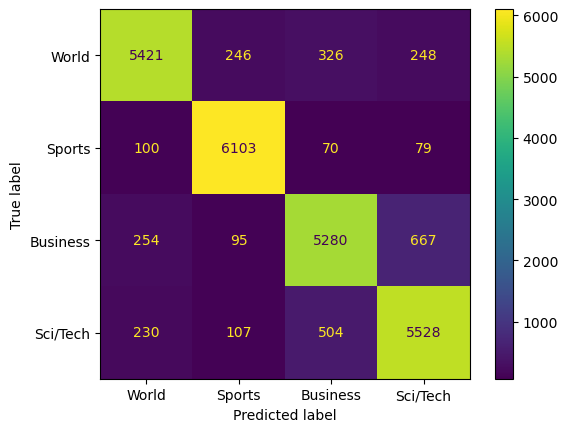

In [39]:
Mteric_s = T.time()

pe_Data3 = Mo_News.predict(iv_Data3)
print(CR(ov_Data3,pe_Data3))
L = CM(ov_Data3,pe_Data3)
D = CMD(confusion_matrix = L, display_labels = ['World', 'Sports', 'Business', 'Sci/Tech'])
D.plot()

Mteric_d = T.time()
print("time-dur-validating =", Mteric_d- Mteric_s)

              precision    recall  f1-score   support

           1       0.91      0.87      0.89      6371
           2       0.93      0.97      0.95      6274
           3       0.85      0.84      0.85      6310
           4       0.84      0.86      0.85      6304

    accuracy                           0.88     25259
   macro avg       0.88      0.88      0.88     25259
weighted avg       0.88      0.88      0.88     25259

time-dur-testing = 0.19989800453186035


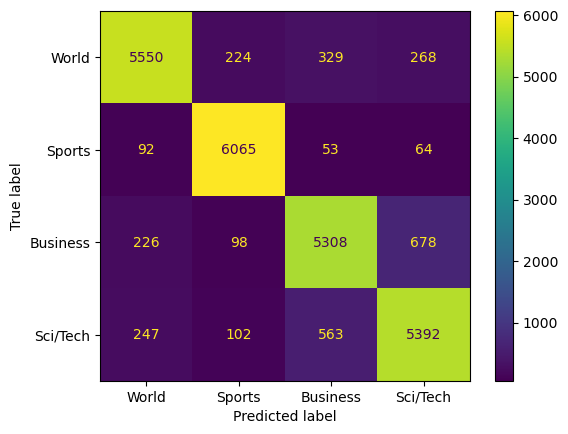

In [40]:
Mteric_s = T.time()

pe_Data3 = Mo_News.predict(is_Data3)
print(CR(os_Data3,pe_Data3))
L = CM(os_Data3,pe_Data3)
D = CMD(confusion_matrix = L, display_labels = ['World', 'Sports', 'Business', 'Sci/Tech'])
D.plot()

Mteric_d = T.time()
print("time-dur-testing =", Mteric_d- Mteric_s)

In [41]:
accuracy_MLP = round(accuracy_score(os_Data3,pe_Data3),2)
accuracy_MLP

0.88

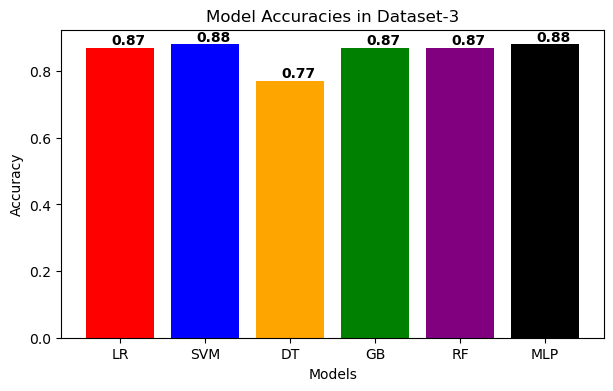

In [42]:
import matplotlib.pyplot as plt

models = ['LR','SVM','DT','GB','RF', 'MLP']
accuracies = [0.87,0.88,0.77,0.87,0.87,0.88]

# set up the bar plot
plt.figure(figsize=(7,4))
plt.bar(models, accuracies, color=['red','blue','orange','green','purple','black'])

# add title and labels
plt.title('Model Accuracies in Dataset-3')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# add the accuracies as text labels on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i-0.1, v+0.01, v, color='black', fontweight='bold')

# show the plot
plt.show()